In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Making the datasets

In [18]:
x1 = np.random.multivariate_normal([1, 1], [[6, 0.5], [0.5, 4]], 500)
x2 = np.random.multivariate_normal([-10, -1], [[4, 0.2], [0.2, 6]], 500)

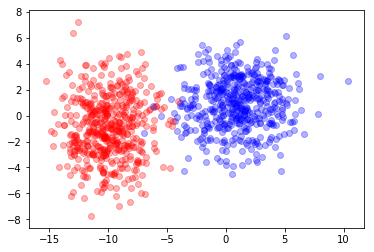

In [28]:
plt.scatter(x1[:, 0], x1[:, 1], c='blue', alpha = 0.3)
plt.scatter(x2[:, 0], x2[:, 1], c='red', alpha = 0.3)

In [30]:
y1 = np.array([0]* 500)
y2 = np.array([1]* 500)

## Reshaping the input datasets into correct format

Essentially we want to convert the predictor variable matrix into a nx by m dimensional matrix; and the target variable vector into a 1 by m dimensional matrix

In [31]:
print "predictor shape: ", x1.shape
print "target shape: ", y1.shape

x1 = x1.T
y1 = y1.reshape(1, 500)

x2 = x2.T
y2 = y2.reshape(1, 500)

print "predictor shape: ", x1.shape
print "target shape: ", y1.shape

predictor shape:  (500, 2)
target shape:  (500,)
predictor shape:  (2, 500)
target shape:  (1, 500)


### Stacking all the observed variables together

In [32]:
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

print "predictor shape: ", x.shape
print "target shape: ", y.shape

predictor shape:  (2, 1000)
target shape:  (1, 1000)


###  Making the train test split
We will pick 0.7 * num_obs number of training examples at random and that will be out training set

In [37]:
trn = np.random.choice(x.shape[1], int(0.7 * x.shape[1]), replace = False)
print trn

tst = np.setdiff1d(np.array(range(x.shape[1])), trn)
print tst

[476 589 625 304 397 103 164 402 870 670  87 554 626  75 501 592 469 426
 983 106 583 243 841 148 221 929 282 638 455 800 986 295 572 960 348 712
 542 703 331 255 848 939 130 704 878 915 341 463 279 710 447 313 732 802
  49 183 143 872   1 598 614 984 942 122 827 799 522 679 709 497 319 283
  34 578 997 671 765 186 150 214 806  51 597 956 559 157 239 209  36  61
 432 346 557 492 509 567 374 624 284 736 952 486 574 971 160 869 271 526
 936 226 362 990 126 490 613 445 278 191 190 706 216 782 673 149 603 151
 678 897 657 393   0 415  17 442 117 411 927 735  94 210 639 441 561 770
 940 444 979 840 311 739 296 185 364 562 240 246 788 382 292 101 987 508
 349 380 429 795 171 803 734 496 819 651  92 551 258 410 876  80 810 746
 705 968 980 124 787 933 175  70 177 966 527 301 546 730 317 176 287 324
 361  14  40 756 577 981 431 198 403 325 888 145 552 208  12 204 964 834
  55 761 751  24 694 889 749 360 234  50 443 850 345 154 104 913 982 801
 967 949 245 464 581 701  66 826 137 996  20 928 97

In [39]:
x_train = x[:, trn]
y_train = y[:, trn]

x_test = x[:, tst]
y_test = y[:, tst]

In [42]:
print x_train.shape
print y_train.shape

print x_test.shape
print y_test.shape

(2, 700)
(1, 700)
(2, 300)
(1, 300)


## Ready for the real deal

Helper Functions

In [108]:
# Sigmoid Function

def sigmoid(x):
    return 1/(1 + np.exp(-x))


# initialize the parameters

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

# propagation

def prop(w, b, x, y):
    m = x.shape[1]
    
    A = sigmoid(np.add(np.dot(w.T, x), b))    
    cost = (-1. / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

    dw = 1. / m * np.sum(np.dot(x, (A - y).T))
    db = 1. / m * np.sum(A - y)
    
    grads = {"dw": dw, "db": db}

    return grads, cost

# optimize

def optimize(w, b, x, y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        grad, cost = prop(w, b, x, y)
        dw = grad["dw"]
        db = grad["db"]
        
        w = w - learning_rate * grad["dw"]
        b = b - learning_rate * grad["db"]
        
        if i % (num_iterations / 10) == 0:
            costs.append(cost)
            print "Cost after ", i, " iterations: ", cost
    print "Cost after ", num_iterations, " iterations: ", cost
    params = {"w": w, "b": b}
    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs


# predict

def predict(w, b, x):
    m = x.shape[1]
    
#    y_pred = np.zeros((1, m))
    y_pred = sigmoid(np.add(np.dot(w.T, x), b))[0]
    
#     print y_pred
    
    y_predictions = np.array(map(lambda i: 1 if i > 0.5 else 0, y_pred))
    y_predictions = y_predictions.reshape(1, m)
    
#     print y_predictions
    
    return y_predictions

## Actual Model built with all the helper functions

In [111]:
# model

def model(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    dim = x_train.shape[0]
    
    w, b = initialize_with_zeros(dim)
    
    params, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate)
    
    w = params["w"]
    b = params["b"]
    
    y_pred_train = predict(w, b, x_train)
    y_pred_test = predict(w, b, x_test)
    
    print "Training Accuracy: ", (1. - np.mean(np.abs(y_train - y_pred_train))) * 100., " percent"
    print "Test Accuracy: ", (1. - np.mean(np.abs(y_test - y_pred_test))) * 100., " percent"
    
    model_char = {"w": w, "b": b, "costs": costs, "learning_rate": learning_rate, "num_iterations": num_iterations}
    
    return model_char
    

In [112]:
model(x_train, y_train, x_test, y_test, learning_rate= 0.01, num_iterations=10000)

Cost after  0  iterations:  0.69314718056
Cost after  1000  iterations:  0.164197986651
Cost after  2000  iterations:  0.127740802882
Cost after  3000  iterations:  0.111539875136
Cost after  4000  iterations:  0.102398657746
Cost after  5000  iterations:  0.0965239898771
Cost after  6000  iterations:  0.0924306127042
Cost after  7000  iterations:  0.0894176196947
Cost after  8000  iterations:  0.0871104363436
Cost after  9000  iterations:  0.0852902970896
Cost after  10000  iterations:  0.0838219686675
Training Accuracy:  97.0  percent
Test Accuracy:  98.0  percent


{'b': -3.4221866029282091,
 'costs': [0.6931471805599454,
  0.16419798665062593,
  0.12774080288222914,
  0.11153987513626662,
  0.10239865774553623,
  0.096523989877148789,
  0.09243061270417359,
  0.089417619694654601,
  0.087110436343636133,
  0.085290297089594319],
 'learning_rate': 0.01,
 'num_iterations': 10000,
 'w': array([[-0.80808911],
        [-0.80808911]])}